In [3]:
!pip install geopandas contextily matplotlib pandas
!pip install --upgrade contextily xyzservices
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx  
import geopandas as gpd
file_path = "south-america_652.geojson"
southamerica= gpd.read_file(file_path)
southamerica


DataSourceError: south-america_652.geojson: No such file or directory

NameError: name 'southamerica' is not defined

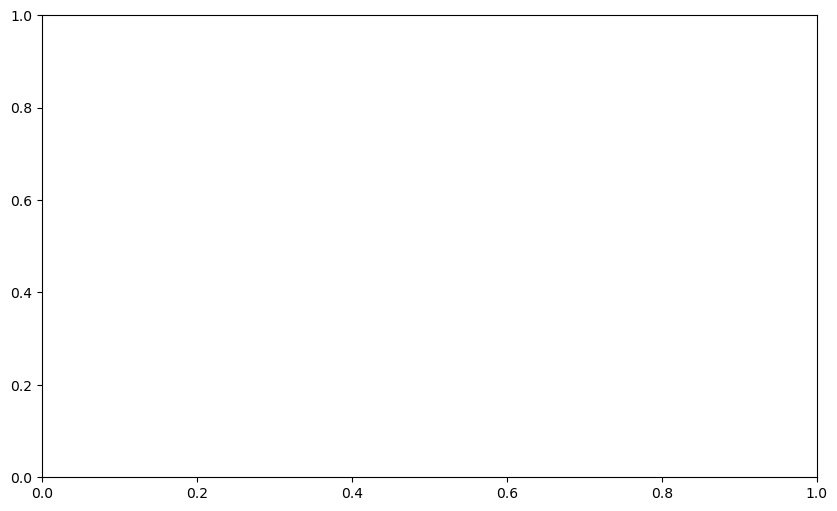

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
southamerica.plot(ax=ax, edgecolor="black", color="pink")

plt.title("South America Map")
plt.show()

In [3]:
southamerica.head()

,name,cartodb_id,created_at,updated_at,geometry
0,French Guiana (France),1,2013-11-28 06:32:17+01:00,2013-11-28 06:33:02+01:00,"POLYGON ((-52.28892 4.87612, -52.32461 4.7709,..."
1,Brazil,33,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-48.48589 -27.76699, -48.55459..."
2,Chile,41,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-67.5752 -55.88965, -67.61143 ..."
3,Argentina,9,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
4,Bolivia,32,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-58.15977 -20.16465, -58.13994 -19.9..."


In [9]:
selected_countries = ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"]
filtered_df = southamerica[southamerica["name"].isin(selected_countries)]
print(southamerica.columns)


Index(['name', 'cartodb_id', 'created_at', 'updated_at', 'geometry'], dtype='object')


In [10]:
population_data = {
    "Country": ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"],
    "Population": [213000000, 19000000, 45000000, 3500000, 17800000, 50800000, 33000000, 7100000]
}
population_df = pd.DataFrame(population_data)

In [11]:
merged_df = filtered_df.merge(population_df, left_on="name", right_on="Country")

In [12]:
import contextily as ctx
print(ctx.providers.keys())

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'BaseMapDE', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'TopPlusOpen', 'Gaode', 'Strava', 'OrdnanceSurvey'])


/srv/conda/lib/python3.11/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


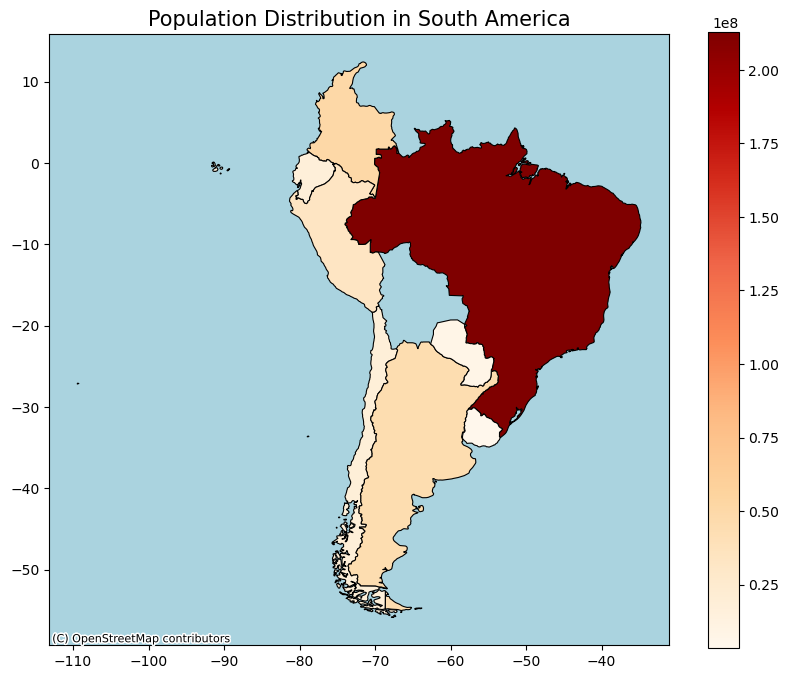

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(column="Population", cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("Population Distribution in South America", fontsize=15)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()





<Axes: >

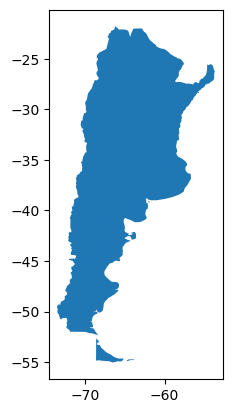

In [14]:
argentina = southamerica[southamerica['name'] == 'Argentina']
argentina.plot()